# 门控制循环单元

门控循环单元（Gated Recurrent Unit, GRU）是一种改进的循环神经网络（RNN），旨在解决传统RNN在处理长序列时的梯度消失问题。GRU通过引入门控机制，有效地控制信息的流动，从而提高了模型的性能。以下是对GRU的全面详细解析。

---

## 1. 背景与动机
传统RNN在处理长序列时，由于梯度消失或梯度爆炸问题，难以捕捉长距离依赖关系。为了解决这一问题，研究者提出了LSTM（长短期记忆网络），但其结构复杂，计算成本较高。GRU作为LSTM的简化版本，通过减少门控数量（从3个减少到2个），在保持性能的同时降低了计算复杂度。

---

## 2. GRU的核心组件
GRU的核心是**两个门控机制**：**更新门（Update Gate）**和**重置门（Reset Gate）**。这两个门控机制共同决定了如何更新和传递信息。

### (1) 更新门（Update Gate）
更新门控制当前状态中有多少信息来自前一时刻的隐藏状态，有多少信息来自当前时刻的候选状态。其数学表达式为：
$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$
- $z_t$：更新门的输出，取值范围为$[0, 1]$。
- $W_z$：更新门的权重矩阵。
- $h_{t-1}$：前一时刻的隐藏状态。
- $x_t$：当前时刻的输入。
- $b_z$：更新门的偏置项。
- $\sigma$：sigmoid激活函数，将输出压缩到$[0, 1]$之间。

更新门的值越接近1，表示保留更多前一时刻的隐藏状态；越接近0，表示更多依赖当前时刻的候选状态。

### (2) 重置门（Reset Gate）
重置门控制前一时刻的隐藏状态中有多少信息被忽略，从而影响当前时刻的候选状态的计算。其数学表达式为：
$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$
- $r_t$：重置门的输出，取值范围为$[0, 1]$。
- $W_r$：重置门的权重矩阵。
- $b_r$：重置门的偏置项。

重置门的值越接近0，表示忽略更多前一时刻的隐藏状态；越接近1，表示保留更多前一时刻的隐藏状态。

### (3) 候选隐藏状态（Candidate Hidden State）
候选隐藏状态是基于当前输入和前一时刻的隐藏状态（经过重置门调整后）计算得到的。其数学表达式为：
$$
\tilde{h}_t = \tanh(W \cdot [r_t \odot h_{t-1}, x_t] + b)
$$
- $\tilde{h}_t$：候选隐藏状态。
- $W$：候选隐藏状态的权重矩阵。
- $b$：候选隐藏状态的偏置项。
- $\odot$：逐元素相乘（Hadamard积）。
- $\tanh$：双曲正切函数，将输出压缩到$[-1, 1]$之间。

重置门$r_t$的作用是控制前一时刻的隐藏状态$h_{t-1}$对候选状态的影响。如果$r_t$接近0，则忽略$h_{t-1}$，候选状态主要依赖当前输入$x_t$。

### (4) 最终隐藏状态（Final Hidden State）
最终隐藏状态是前一时刻的隐藏状态和当前时刻的候选隐藏状态的加权和，权重由更新门$z_t$决定。其数学表达式为：
$$
h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t
$$
- 如果$z_t$接近1，则$h_t$主要依赖候选状态$\tilde{h}_t$。
- 如果$z_t$接近0，则$h_t$主要依赖前一时刻的隐藏状态$h_{t-1}$。

---

## 3. GRU的工作流程
1. **输入**：当前时刻的输入$x_t$和前一时刻的隐藏状态$h_{t-1}$。
2. **计算更新门和重置门**：
   - 更新门$z_t$决定保留多少前一时刻的信息。
   - 重置门$r_t$决定忽略多少前一时刻的信息。
3. **计算候选隐藏状态**：
   - 基于重置门调整后的前一时刻隐藏状态和当前输入，计算候选状态$\tilde{h}_t$。
4. **计算最终隐藏状态**：
   - 通过更新门$z_t$对前一时刻隐藏状态和候选状态进行加权，得到当前时刻的隐藏状态$h_t$。
5. **输出**：当前时刻的隐藏状态$h_t$可以作为输出，也可以传递给下一时刻。

---

## 4. GRU的特点
### (1) 优点
- **缓解梯度消失问题**：通过门控机制，GRU能够更好地捕捉长距离依赖关系。
- **计算效率高**：相比LSTM，GRU只有两个门控机制，参数更少，计算速度更快。
- **性能优越**：在许多任务中，GRU的表现与LSTM相当，甚至更好。

### (2) 缺点
- **仍然存在梯度消失问题**：虽然GRU缓解了梯度消失问题，但在处理极长序列时，仍然可能出现梯度消失。
- **结构相对简单**：在某些复杂任务上，LSTM可能表现更好。

---

## 5. GRU与LSTM的对比
| 特性                | GRU                          | LSTM                         |
|---------------------|------------------------------|------------------------------|
| 门控机制数量         | 2个（更新门、重置门）         | 3个（输入门、遗忘门、输出门） |
| 参数数量             | 较少                         | 较多                         |
| 计算复杂度           | 较低                         | 较高                         |
| 长序列处理能力       | 较强                         | 更强                         |
| 适用场景             | 中等复杂度任务               | 高复杂度任务                 |

---

## 6. 应用场景
GRU广泛应用于以下领域：
- **自然语言处理**：机器翻译、文本生成、情感分析。
- **时间序列预测**：股票价格预测、天气预测。
- **语音识别**：语音到文本的转换。
- **推荐系统**：用户行为序列建模。

## 从零实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

### 初始化模型参数

In [2]:
import torch

def get_params(vocab_size, num_hiddens, device):
    """
    初始化GRU模型的参数。

    参数:
    - vocab_size: 词汇表大小，也是输入和输出的维度。
    - num_hiddens: 隐藏层的大小。
    - device: 计算设备（如CPU或GPU）。

    返回:
    - params: 包含所有参数的列表，所有参数都设置为需要计算梯度。
    """
    # 输入和输出的维度等于词汇表大小
    num_inputs = num_outputs = vocab_size

    # 定义一个辅助函数，用于生成正态分布的随机数
    def normal(shape):
        """
        生成服从正态分布的随机数，标准差为0.01。

        参数:
        - shape: 张量的形状。

        返回:
        - 随机初始化的张量。
        """
        return torch.randn(size=shape, device=device) * 0.01

    # 定义一个辅助函数，用于初始化一组参数（权重和偏置）
    def three():
        """
        初始化一组参数，包括输入到隐藏层的权重、隐藏层到隐藏层的权重以及偏置。

        返回:
        - 三个张量：输入权重、隐藏权重、偏置。
        """
        return (normal((num_inputs, num_hiddens)),  # 输入权重
                normal((num_hiddens, num_hiddens)), # 隐藏权重
                torch.zeros(num_hiddens, device=device)) # 偏置

    # 初始化更新门参数
    W_xz, W_hz, b_z = three()  # 更新门的输入权重、隐藏权重、偏置
    # 初始化重置门参数
    W_xr, W_hr, b_r = three()  # 重置门的输入权重、隐藏权重、偏置
    # 初始化候选隐藏状态参数
    W_xh, W_hh, b_h = three()  # 候选隐藏状态的输入权重、隐藏权重、偏置

    # 初始化输出层参数
    W_hq = normal((num_hiddens, num_outputs))  # 隐藏状态到输出的权重
    b_q = torch.zeros(num_outputs, device=device)  # 输出的偏置

    # 将所有参数放入一个列表中
    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q]

    # 设置所有参数需要计算梯度
    for param in params:
        param.requires_grad_(True)

    return params

### 定义模型

定义一个函数init_gru_state，与之前的init_rnn_state函数一样

In [3]:
def init_gru_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device), )

In [4]:
import torch

def gru(inputs, state, params):
    """
    实现GRU的前向传播。

    参数:
    - inputs: 输入序列，形状为 (时间步数, 批量大小, 输入维度)。
    - state: 初始隐藏状态，形状为 (批量大小, 隐藏层大小)。
    - params: GRU模型的参数列表，包括更新门、重置门、候选隐藏状态以及输出层的权重和偏置。

    返回:
    - outputs: 所有时间步的输出序列，形状为 (时间步数 * 批量大小, 输出维度)。
    - (H,): 最终隐藏状态，形状为 (批量大小, 隐藏层大小)。
    """
    # 解包参数
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_hq, b_q = params

    # 初始隐藏状态
    H, = state

    # 用于存储每个时间步的输出
    outputs = []

    # 遍历输入序列的每个时间步
    for X in inputs:
        # 计算更新门 (Z)
        Z = torch.sigmoid((X @ W_xz) + (H @ W_hz) + b_z)

        # 计算重置门 (R)
        R = torch.sigmoid((X @ W_xr) + (H @ W_hr) + b_r)

        # 计算候选隐藏状态 (H_tilda)
        H_tilda = torch.tanh((X @ W_xh) + ((R * H) @ W_hh) + b_h)

        # 更新隐藏状态 (H)
        H = Z * H + (1 - Z) * H_tilda

        # 计算输出 (Y)
        Y = H @ W_hq + b_q

        # 将当前时间步的输出添加到输出列表
        outputs.append(Y)

    # 将所有时间步的输出拼接成一个张量
    outputs = torch.cat(outputs, dim=0)

    # 返回输出序列和最终隐藏状态
    return outputs, (H,)

### 训练与预测

困惑度 1.1, 11832.9 词元/秒 cuda:0
time traveller for so it will be convenient to speak of himwas e
travelleryou can show black is white by argument said filby


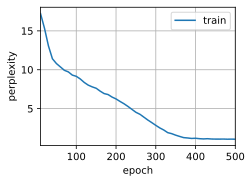

In [6]:
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 1
model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_params,
    init_gru_state, gru)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

## 简洁的实现

高级API中就包含了基本所有的配置细节，使用起来很方便，运行也会更加快速

困惑度 1.0, 215499.5 词元/秒 cuda:0
time travelleryou can show black is white by argument said filby
traveller with a slight accession ofcheerfulness really thi


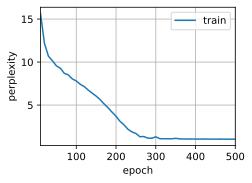

In [7]:
num_inputs = vocab_size
gru_layer = nn.GRU(num_inputs, num_hiddens)
model = d2l.RNNModel(gru_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 长短期记忆网络

## 1. 背景
循环神经网络（RNN）在处理序列数据时表现出色，但在处理长序列时容易出现梯度消失或梯度爆炸问题。LSTM（Long Short-Term Memory）是一种特殊的RNN，由Hochreiter和Schmidhuber于1997年提出，旨在解决这些问题。LSTM通过引入门控机制，能够有效地捕捉长期依赖关系。

## 2. LSTM的核心结构
LSTM的核心在于其单元结构，每个LSTM单元包含三个门：输入门、遗忘门和输出门。这些门控制信息的流动，确保网络能够选择性地记住或遗忘信息。

### 2.1 遗忘门（Forget Gate）
遗忘门决定哪些信息应该被丢弃。它通过一个sigmoid函数生成一个介于0和1之间的值，表示保留或遗忘的程度。

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

其中：
- $f_t$ 是遗忘门的输出
- $\sigma$ 是sigmoid函数
- $W_f$ 是权重矩阵
- $h_{t-1}$ 是前一时刻的隐藏状态
- $x_t$ 是当前时刻的输入
- $b_f$ 是偏置项

### 2.2 输入门（Input Gate）
输入门决定哪些新信息应该被存储到细胞状态中。它包含两个部分：一个sigmoid函数和一个tanh函数。

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

其中：
- $i_t$ 是输入门的输出
- $\tilde{C}_t$ 是候选细胞状态
- $W_i$ 和 $W_C$ 是权重矩阵
- $b_i$ 和 $b_C$ 是偏置项

### 2.3 细胞状态更新
细胞状态 $C_t$ 是LSTM的核心，它通过遗忘门和输入门的信息进行更新。

$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t
$$

### 2.4 输出门（Output Gate）
输出门决定哪些信息应该被输出到隐藏状态 $h_t$。

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
$$
h_t = o_t \cdot \tanh(C_t)
$$

其中：
- $o_t$ 是输出门的输出
- $W_o$ 是权重矩阵
- $b_o$ 是偏置项

## 3. LSTM的工作流程
1. **遗忘门**：决定哪些信息从细胞状态中丢弃。
2. **输入门**：决定哪些新信息存储到细胞状态中。
3. **细胞状态更新**：更新细胞状态。
4. **输出门**：决定哪些信息输出到隐藏状态。

## 4. LSTM的优势
- **长期依赖**：LSTM能够有效地捕捉长期依赖关系，适用于处理长序列数据。
- **梯度问题**：通过门控机制，LSTM缓解了梯度消失和梯度爆炸问题。
- **灵活性**：LSTM可以根据任务需求调整信息的流动，具有较强的适应性。

## 5. LSTM的应用
LSTM广泛应用于各种序列数据处理任务，如：
- **自然语言处理**：机器翻译、文本生成、情感分析等。
- **语音识别**：语音到文本的转换。
- **时间序列预测**：股票价格预测、天气预测等。

## 从零实现

In [8]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

### 初始化模型参数

接下来定义和初始化模型参数。如前所述，超参数num_hiddens定义隐藏单元的数量。我们按照标准差0.01的高斯分布初始化权重，并将偏置项设为0。

In [9]:
import torch  # 导入PyTorch库

def get_lstm_params(vocab_size, num_hiddens, device):
    """
    初始化LSTM模型的参数。

    参数:
    - vocab_size: 词汇表大小，也是输入和输出的维度。
    - num_hiddens: 隐藏层的大小。
    - device: 计算设备（如CPU或GPU）。

    返回:
    - params: 包含所有LSTM参数的列表。
    """
    # 输入和输出的维度等于词汇表大小
    num_inputs = num_outputs = vocab_size

    def normal(shape):
        """
        生成随机初始化的权重矩阵。

        参数:
        - shape: 权重矩阵的形状。

        返回:
        - 随机初始化的权重矩阵。
        """
        return torch.randn(size=shape, device=device) * 0.01  # 使用较小的随机值初始化

    def three():
        """
        生成LSTM单元的权重矩阵和偏置项。

        返回:
        - 三个值：输入到隐藏层的权重矩阵、隐藏层到隐藏层的权重矩阵、偏置项。
        """
        return (normal((num_inputs, num_hiddens)),  # 输入到隐藏层的权重
                normal((num_hiddens, num_hiddens)),  # 隐藏层到隐藏层的权重
                torch.zeros(num_hiddens, device=device))  # 偏置项初始化为0

    # 初始化输入门参数
    W_xi, W_hi, b_i = three()  # 输入门权重和偏置
    # 初始化遗忘门参数
    W_xf, W_hf, b_f = three()  # 遗忘门权重和偏置
    # 初始化输出门参数
    W_xo, W_ho, b_o = three()  # 输出门权重和偏置
    # 初始化候选记忆元参数
    W_xc, W_hc, b_c = three()  # 候选记忆元权重和偏置

    # 初始化输出层参数
    W_hq = normal((num_hiddens, num_outputs))  # 隐藏层到输出层的权重
    b_q = torch.zeros(num_outputs, device=device)  # 输出层的偏置

    # 将所有参数放入一个列表中
    params = [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q]

    # 设置所有参数需要计算梯度
    for param in params:
        param.requires_grad_(True)

    return params  # 返回参数列表

### 定义模型

在初始化函数中，长短期记忆网络的隐状态需要返回一个额外的记忆元，单元的值为0，形状为（批量大小，隐藏单元数）。因此，我们得到以下的状态初始化

In [10]:
def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))

In [11]:
import torch  # 导入PyTorch库

def lstm(inputs, state, params):
    """
    LSTM的前向传播函数。

    参数:
    - inputs: 输入序列，形状为 (时间步数, 批量大小, 输入维度)。
    - state: 当前状态，包含隐藏状态 H 和细胞状态 C。
    - params: LSTM的参数列表，包含权重矩阵和偏置项。

    返回:
    - outputs: 所有时间步的输出，形状为 (时间步数, 批量大小, 输出维度)。
    - (H, C): 更新后的隐藏状态和细胞状态。
    """
    # 解包LSTM参数
    [W_xi, W_hi, b_i, W_xf, W_hf, b_f, W_xo, W_ho, b_o, W_xc, W_hc, b_c, W_hq, b_q] = params

    # 解包当前状态
    (H, C) = state

    # 用于存储每个时间步的输出
    outputs = []

    # 遍历输入序列中的每个时间步
    for X in inputs:
        # 计算输入门
        I = torch.sigmoid((X @ W_xi) + (H @ W_hi) + b_i)
        # 计算遗忘门
        F = torch.sigmoid((X @ W_xf) + (H @ W_hf) + b_f)
        # 计算输出门
        O = torch.sigmoid((X @ W_xo) + (H @ W_ho) + b_o)
        # 计算候选记忆元
        C_tilda = torch.tanh((X @ W_xc) + (H @ W_hc) + b_c)

        # 更新细胞状态
        C = F * C + I * C_tilda
        # 更新隐藏状态
        H = O * torch.tanh(C)

        # 计算当前时间步的输出
        Y = (H @ W_hq) + b_q
        # 将输出添加到输出列表中
        outputs.append(Y)

    # 将所有时间步的输出拼接在一起
    outputs = torch.cat(outputs, dim=0)

    # 返回输出和更新后的状态
    return outputs, (H, C)

### 训练和预测

困惑度 1.1, 9309.0 词元/秒 cuda:0
time traveller helhadthe procent alyound mondemately he man in f
traveller held in his hand was a glitteringmetallic framewo


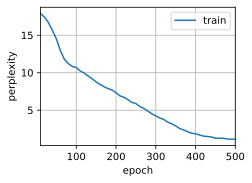

In [12]:
vocab_size, num_hiddens, device = len(vocab), 256, d2l.try_gpu()
num_epochs, lr = 500, 1
model = d2l.RNNModelScratch(len(vocab), num_hiddens, device, get_lstm_params,
                            init_lstm_state, lstm)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

## 关于简洁实现

使用高级API会简单很多

困惑度 1.1, 178077.6 词元/秒 cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


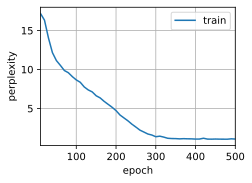

In [13]:
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

# 深度循环神经网络

深度循环神经网络（Deep Recurrent Neural Networks, Deep RNNs）是循环神经网络（RNN）的一种扩展形式，旨在通过增加网络的深度来提高其表达能力。RNN本身已经在处理序列数据（如时间序列、自然语言等）方面表现出色，但标准的RNN通常只有一层隐藏层，这限制了其捕捉复杂模式的能力。深度RNN通过堆叠多个隐藏层来增强网络的表达能力，使其能够学习到更复杂的特征。
### 1. 基本结构

深度RNN的核心思想是将多个RNN层堆叠在一起，每一层的输出作为下一层的输入。假设我们有一个深度RNN，包含$L$个隐藏层，每一层的隐藏状态为$\mathbf{h}_t^{(l)}$，其中$l$表示第$l$层，$t$表示时间步。每一层的计算可以表示为：

$$
\mathbf{h}_t^{(l)} = f\left(\mathbf{W}_h^{(l)} \mathbf{h}_t^{(l-1)} + \mathbf{W}_x^{(l)} \mathbf{h}_{t-1}^{(l)} + \mathbf{b}^{(l)}\right)
$$

其中：
- $\mathbf{h}_t^{(l)}$ 是第$l$层在时间步$t$的隐藏状态。
- $\mathbf{h}_t^{(l-1)}$ 是第$l-1$层在时间步$t$的输出（对于第一层，$\mathbf{h}_t^{(0)}$ 是输入$\mathbf{x}_t$）。
- $\mathbf{W}_h^{(l)}$ 和 $\mathbf{W}_x^{(l)}$ 是第$l$层的权重矩阵。
- $\mathbf{b}^{(l)}$ 是第$l$层的偏置向量。
- $f$ 是激活函数，通常为$tanh$或ReLU。

### 2. 前向传播

在深度RNN中，前向传播的过程是从输入层开始，逐层计算每一层的隐藏状态，直到输出层。对于每一层$l$和时间步$t$，隐藏状态$\mathbf{h}_t^{(l)}$的计算依赖于前一层的输出$\mathbf{h}_t^{(l-1)}$和上一时间步的隐藏状态$\mathbf{h}_{t-1}^{(l)}$。

最终的输出$\mathbf{y}_t$通常是通过一个全连接层从最后一层的隐藏状态$\mathbf{h}_t^{(L)}$计算得到的：

$$
\mathbf{y}_t = \mathbf{W}_y \mathbf{h}_t^{(L)} + \mathbf{b}_y
$$

其中$\mathbf{W}_y$和$mathbf{b}_y$是输出层的权重和偏置。

### 3. 反向传播

深度RNN的反向传播过程与标准RNN类似，但需要逐层计算梯度。由于RNN的时序特性，反向传播通过时间（Backpropagation Through Time, BPTT）算法来计算梯度。对于深度RNN，BPTT需要在每一层中分别计算梯度，并将梯度从输出层逐层传递到输入层。

由于深度RNN的层数较多，梯度消失或梯度爆炸问题可能会更加严重。因此，在实际应用中，通常会使用一些技来缓解这些问题，如梯度裁剪、使用LSTM或GRU单元等。

### 4. 深度RNN的变体

深度RNN可以通过不同的方式扩展和变体，以适应不同的任务需求。以下是一些常见的变体：

- **堆叠RNN（Stacked RNN）**：这是最简单的深度RNN形式，直接将多个RNN层堆叠在一起。
- **双向深度RNN（Bidirectional Deep RNN）**：在每一层中使用双向RNN，即同时考虑过去和未来的信息。
- **残差连接（Residual Connections）**：在深度RNN中引入残差连接，以缓解梯度消失问题并加速训练。
- **LSTM/GRU深度RNN*：使用LSTM或GRU单元代替标准RNN单元，以更好地捕捉长期依赖关系。

### 5. 应用场景

深度RNN在许多序列建模任务中表现出色，特别是在需要捕捉复杂时间依赖关系的场景中。以下是一些常见的应用场景：

- **自然语言处理（NLP）**：如机器翻译、文本生成、情感分析等。
- **语音识别**：将音频信号转换为文本。
- **时间序预测**：如股票价格预测、天气预测等。
- **视频分析**：如动作识别、视频字幕生成等。

### 6. 挑战与优化

尽管深度RNN在处理序列数据方面表现出色，但也面临一些挑战：

- **梯度消失和梯度爆炸**：由于RNN的时序特性，梯度在反向传播过程中可能会消失或爆炸，导致训练困难。使用LSTM或GRU单元、梯度裁剪等技术可以缓解这一问题。
- **计算复杂度**：深度RNN的计算复杂度较高，尤其是在处理长序列时。使用并行计算、优化算法（如Adam）等方法可以提高训练效率。
- 、计算复杂度高等挑战，但通过使用LSTM/GRU单元、残差连接、正则化等技术，深度RNN在许多序列建模任务中取得了显著的成功。

## 简洁实现

实现深层的循环网络如果通过手动实现是复杂的，而且之前也已经实现过单层的，因此这里直接考虑使用高级API实现。

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

这里对于超参数的选择与之前是类似的，因为有不同的词元，所以输入和输出都选择相同数量，即vocab_size。隐藏单元的数量仍然是256。唯一的区别是，现在通过num_layers的值来设定隐藏层数。

In [2]:
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
device = d2l.try_gpu()
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)

## 训练和预测

困惑度 1.0, 76563.7 词元/秒 cuda:0
time traveller for so it will be convenient to speak of himwas e
travelleryou can show black is white by argument said filby


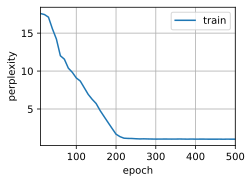

In [3]:
num_epochs, lr = 500, 2
d2l.train_ch8(model, train_iter, vocab, lr*1.0, num_epochs, device)

# 双向循环神经网络

双向循环神经网络（Bidirectional Recurrent Neural Network, BiRNN）是一种改进的循环神经网络结构，专门设计用于捕捉序列数据中的双向依赖关系。在许多任务中，序列的当前状态不仅依赖于过去的信息，还可能依赖于未来的信息。BiRNN通过同时考虑过去和未来的上下文信息，能够更好地建模这种双向依赖关系。

## 1. 基本结构

BiRNN的核心思想是使用两个独立的RNN层，分别处理序列的正向和反向信息。具体来说，BiRNN由两个RNN组成：
- **正向RNN**：从序列的起始位置到结束位置进行处理，捕捉过去的信息。
- **反向RNN**：从序列的结束位置到起始位置进行处理，捕捉未来的信息。

对于时间步$t$，正向RNN的隐藏状态$\overrightarrow{\mathbf{h}}_t$和反向RNN的隐藏状态$\overleftarrow{\mathbf{h}}_t$分别计算如下：

$$
\overrightarrow{\mathbf{h}}_t = f\left(\mathbf{W}_{\overrightarrow{h}} \overrightarrow{\mathbf{h}}_{t-1} + \mathbf{W}_{\overrightarrow{x}} \mathbf{x}_t + \mathbf{b}_{\overrightarrow{h}}\right)
$$

$$
\overleftarrow{\mathbf{h}}_t = f\left(\mathbf{W}_{\overleftarrow{h}} \overleftarrow{\mathbf{h}}_{t+1} + \mathbf{W}_{\overleftarrow{x}} \mathbf{x}_t + \mathbf{b}_{\overleftarrow{h}}\right)
$$

其中：
- $\overrightarrow{\mathbf{h}}_t$ 和 $\overleftarrow{\mathbf{h}}_t$ 分别是正向和反向RNN在时间步$t$的隐藏状态。
- $\mathbf{W}_{\overrightarrow{h}}$ 和 $\mathbf{W}_{\overleftarrow{h}}$ 是正向和反向RNN的隐藏状态权重矩阵。
- $\mathbf{W}_{\overrightarrow{x}}$ 和 $\mathbf{W}_{\overleftarrow{x}}$ 是正向和反向RNN的输入权重矩阵。
- $\mathbf{b}_{\overrightarrow{h}}$ 和 $\mathbf{b}_{\overleftarrow{h}}$ 是正向和反向RNN的偏置向量。
- $f$ 是激活函数，通常为$\tanh$或ReLU。

## 2. 前向传播

在BiRNN中，前向传播的过程包括两个独立的RNN：正向RNN和反向RNN。对于每个时间步$t$，正向RNN从$t=1$到$t=T$计算隐藏状态$\overrightarrow{\mathbf{h}}_t$，而反向RNN从$t=T$到$t=1$计算隐藏状态$\overleftarrow{\mathbf{h}}_t$。

最终的输出$\mathbf{y}_t$通常是通过将正向和反向的隐藏状态拼接起来，然后通过一个全连接层计算得到的：

$$
\mathbf{y}_t = \mathbf{W}_y \left[ \overrightarrow{\mathbf{h}}_t; \overleftarrow{\mathbf{h}}_t \right] + \mathbf{b}_y
$$

其中：
- $\left[ \overrightarrow{\mathbf{h}}_t; \overleftarrow{\mathbf{h}}_t \right]$ 表示将正向和反向的隐藏状态拼接在一起。
- $\mathbf{W}_y$ 和 $\mathbf{b}_y$ 是输出层的权重和偏置。

## 3. 反向传播

BiRNN的反向传播过程与标准RNN类似，但需要分别对正向RNN和反向RNN进行反向传播。由于BiRNN包含两个独立的RNN，反向传播时需要分别计算正向和反向RNN的梯度，并将它们结合起来更新模型参数。

由于BiRNN的结构更加复杂，梯度消失或梯度爆炸问题可能会更加严重。因此，在实际应用中，通常会使用LSTM或GRU单元来替代标准的RNN单元，以更好地捕捉长期依赖关系。

## 4. BiRNN的变体

BiRNN可以通过不同的方式扩展和变体，以适应不同的任务需求。以下是一些常见的变体：

- **双向LSTM（BiLSTM）**：使用LSTM单元代替标准RNN单元，以更好地捕捉长期依赖关系。
- **双向GRU（BiGRU）**：使用GRU单元代替标准RNN单元，具有与LSTM类似的性能，但计算复杂度更低。
- **深度双向RNN（Deep BiRNN）**：将多个双向RNN层堆叠在一起，以增强模型的表达能力。

## 5. 应用场景

BiRNN在许多序列建模任务中表现出色，特别是在需要同时考虑过去和未来信息的场景中。以下是一些常见的应用场景：

- **自然语言处理（NLP）**：如机器翻译、文本生成、命名实体识别等。BiRNN能够捕捉句子中词语之间的双向依赖关系，从而提高模型的性能。
- **语音识别**：将音频信号转换为文本。BiRNN能够同时考虑音频信号的前后上下文信息，从而提高识别准确率。
- **时间序列预测**：如股票价格预测、天气预测等。BiRNN能够捕捉时间序列中的双向依赖关系，从而提高预测精度。
- **生物信息学**：如蛋白质结构预测、基因序列分析等。BiRNN能够捕捉生物序列中的双向依赖关系，从而提高分析准确性。

## 6. 挑战与优化

尽管BiRNN在处理序列数据方面表现出色，但也面临一些挑战：

- **计算复杂度**：BiRNN需要同时处理正向和反向的序列信息，计算复杂度较高。使用并行计算、优化算法（如Adam）等方法可以提高训练效率。
- **梯度消失和梯度爆炸**：由于BiRNN的时序特性，梯度在反向传播过程中可能会消失或爆炸，导致训练困难。使用LSTM或GRU单元、梯度裁剪等技术可以缓解这一问题。
- **过拟合**：BiRNN容易过拟合，特别是在数据量有限的情况下。使用正则化技术（如Dropout）可以缓解这一问题。



## 7. 双向循环神经网络的错误应用

由于双向循环神经网络使用了过去的和未来的数据，所以我们不能盲目地将这一语言模型应用于任何预测任
务。尽管模型产出的困惑度是合理的，该模型预测未来词元的能力却可能存在严重缺陷。我们用下面的示例
代码引以为戒，以防在错误的环境中使用它们。

困惑度 1.1, 47985.9 词元/秒 cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


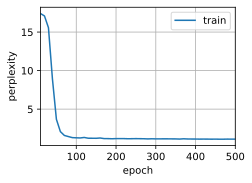

In [1]:
import torch
from torch import nn
from d2l import torch as d2l
# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
# 通过设置“bidirective=True”来定义双向LSTM模型
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
# 训练模型
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)